# Poisson Regression

Poisson regression is a type of model fitting exercise where the observed responses are discrete encoded $Y_i \in \{0,1,2,\dots,\aleph_0\} $, but more than just binary.

The Poisson regression kernel function is typically: 

$$\mu_i(\beta) = {e^{X_i~\beta}} $$

or

$$\mu_i(\beta) = log({X_i~\beta}) $$

<!--or

$$\mu_i(\beta) = {X_i~\beta} $$-->

where $X_i$ is the i-th row of the design matrix, and $\beta$ are unknown coefficients.

The associated optimization problem is to minimize some measure of error between the model values (above) and the observed values, typically a squared error is considered.

If we consider a single observatyon $Y_i \in \{0,1,2,\dots,\aleph_0\} $ the error is

$$\epsilon_i = Y_i - \mu_i(\beta) = Y_i - {e^{X_i~\beta}} $$

The function we wish to minimize is 

$$\min_{\beta} (Y - \mu(\beta))^T(Y-\mu(\beta))$$

## Homebrew Type 1

In [2]:
# build a dataset -  
import numpy as np
from numpy.random import normal
import math

M = 10_000
x = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(x, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)
y = np.exp(z)

X    = x  # Design Matrix
Yobs = [math.trunc(item) for item in y]  # Discrete Target vector 

print(X[2][0])
print(x[2][0])
print(Yobs[0])

-0.9319080463653616
-0.9319080463653616
9


In [3]:
def mu(b0,b1,b2,b3,x,y,z): #poisson function (scalar) 3-design columns
    import math
    mu = math.exp(b0+b1*x+b2*y+b3*z)
    return(mu)

def sse(mod,obs): #compute sse from observations and model values
    howmany = len(mod)
    sse=0.0
    for i in range(howmany):
        sse=sse+(mod[i]-obs[i])**2
    return(sse)

def merit(beta): # merit function to minimize
    global Yobs,X #access lists already defined external to function
    mod=[0 for i in range(len(X))]
    for i in range(len(X)):
        mod[i]=mu(beta[0],beta[1],beta[2],beta[3],X[i][0],X[i][1],X[i][2])
    merit = sse(mod,Yobs)
    return(merit)

In [4]:
beta = [0,0,0,0] #initial guess of betas
merit(beta) #check that does not raise an exception

772974.0

In [5]:
import numpy as np
from scipy.optimize import minimize

#x0 = np.array([-3.0597,0.1615])
x0 = np.array(beta)
res = minimize(merit, x0, method='powell',options={'disp': True , 'maxiter':10 , 'return_all' : True})

Optimization terminated successfully.
         Current function value: 1043.405143
         Iterations: 5
         Function evaluations: 253


In [6]:
res.x

array([1.92831365, 0.1564842 , 0.52252218, 0.20937303])

In [7]:
res.fun

array(1043.40514276)

## Using `sklearn` package

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html

First using all the data:

In [8]:
# import the class
from sklearn.linear_model import PoissonRegressor

X_train = X
y_train = Yobs

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
posreg = PoissonRegressor()
# fit the model with data
posreg.fit(X_train,y_train)

#
y_pred=posreg.predict(X_train)

In [11]:
print(posreg.intercept_)
print(posreg.coef_)
#y.head()

1.9572108563148747
[0.14126387 0.47167161 0.18826   ]


In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Yobs,test_size=0.25,random_state=0)

In [16]:
# import the class
from sklearn.linear_model import PoissonRegressor


# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
posreg = PoissonRegressor()
# fit the model with data
posreg.fit(X_train,y_train)

#
y_pred=posreg.predict(X_test)

In [30]:
# Load a Plotting Tool
import matplotlib.pyplot as plt
def make1plot(listx1,listy1,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',marker='o',linewidth=0) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

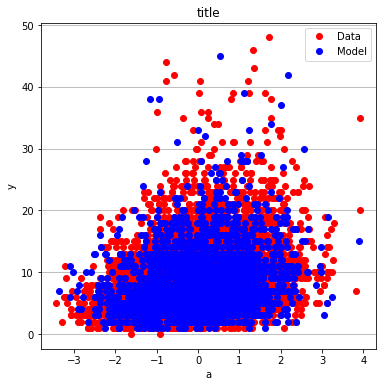

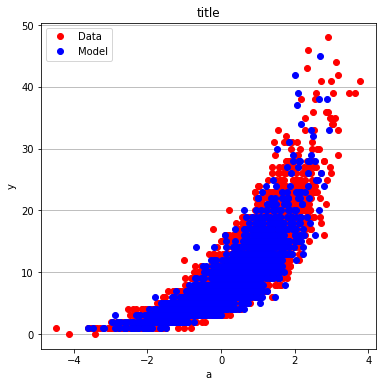

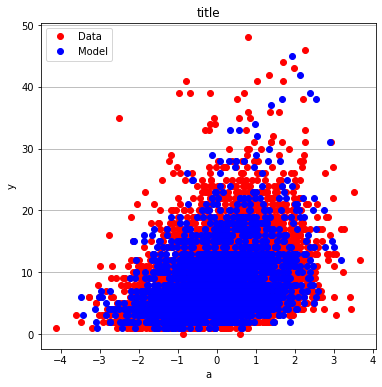

In [33]:
make2plot(X_train[:,0],y_train,X_test[:,0],y_test,"a","y","title");
make2plot(X_train[:,1],y_train,X_test[:,1],y_test,"a","y","title")
make2plot(X_train[:,2],y_train,X_test[:,2],y_test,"a","y","title")

## Homebrew Type 2

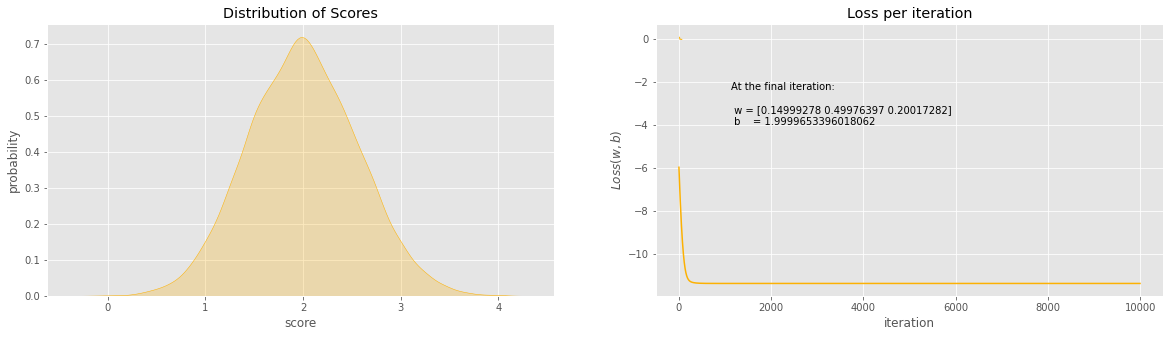

The final values for w = [0.14999278 0.49976397 0.20017282]
The final value for b = 1.9999653396018062


In [3]:
# source code adapted from https://github.com/ximenasandoval/
#                          Poisson_regression/blob/main/
#                          Poisson%20regression%20model.ipynb

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import normal
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('ggplot')



np.random.seed(37)
sns.color_palette("Set2", as_cmap=True)

M = 10_000
x = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(x, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)
y = np.exp(z)



fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.kdeplot(z, ax=ax[0], color='#fcb103', shade=True)
ax[0].set_title(r'Distribution of Scores')
ax[0].set_xlabel('score')
ax[0].set_ylabel('probability')

sns.kdeplot(y, ax=ax[1], color='#fcb103', shade=True)
ax[1].set_title(r'Distribution of Means')
ax[1].set_xlabel('mean')
ax[1].set_ylabel('probability')

def loss(x, y, w, b):
    y_hat = np.exp(x @ w + b)
    # You can use the normal MSE error too! 
    #error = np.square(y_hat - y).mean() / 2
    error = (y_hat - np.log(y_hat) * y).mean()
    return error
        
def grad(x, y, w, b):
    M, n = x.shape
    y_hat = np.exp(x @ w + b)
    dw = (x.T @ (y_hat - y)) / M
    db = (y_hat - y).mean()
    return dw, db

def gradient_descent(x, y, w_0, b_0, alpha, num_iter):
    w, b = w_0.copy(), b_0
    hist = np.zeros(num_iter)
    M, n = x.shape
    
    for iter in range(num_iter):
        dw, db = grad(x, y, w, b)
        w -= alpha * dw 
        b -= alpha * db
        hist[iter] = loss(x, y, w, b)

    return w, b, hist


M, n = x.shape
w_0 = np.zeros((n, ))
b_0 = 1
alpha = 0.001
w, b, hist = gradient_descent(x, y, w_0, b_0, alpha, num_iter=10_000)




plt.plot(hist, 'b', color='#fcb103')
plt.title(u'Loss per iteration')
plt.xlabel(u'iteration')
plt.ylabel(r'$Loss(w, b)$')
plt.figtext(x=.6, y=.6, s="At the final iteration:\n\n w = {}\n b    = {}".format(w, b))
plt.show()



print(f"The final values for w = {w}")
print(f"The final value for b = {b}")



In [4]:
x

array([[-0.05446361,  0.13388209,  0.22244442],
       [ 0.67430807, -0.96145276,  0.81258983],
       [ 0.34664703, -0.103717  ,  0.59895649],
       ...,
       [-0.72555704, -0.91534393, -1.4203312 ],
       [ 0.33369825, -1.25826271, -1.23006311],
       [ 0.77013718,  0.38102387,  0.38720335]])